In [2]:
import numpy as np
from utils import axvlines as pltX
import matplotlib.pyplot as plt
from NeuroTools import stgen
%matplotlib inline
st_gen = stgen.StGen()

k = 10 # JUST A MULTIPLIER
T = 10000*k

# we set the mean frequencies we want to have in four different periods:
rate = np.array([20, 40, 70, 110]).astype('int') 
# set time edges where we want those mean poisson-distributed frequencies:
time = np.linspace(0,T,5)
time = time[:-1]
# generate non-stationary-distributed Poisson spiking times:
a = st_gen.inh_poisson_generator(rate=rate, t=time, t_stop=T, array=True)

# we can plot the spikes:
# plt.figure(figsize=(15,5))
# plt.stem(a.T, np.ones_like(a.T))
# pltX.axvlines(time, c='red')

OBSERVED FREQUENCIES WITHIN THE FOUR PERIODS:
21.24  Hz
42.35999999999999  Hz
68.96  Hz
109.39999999999999  Hz


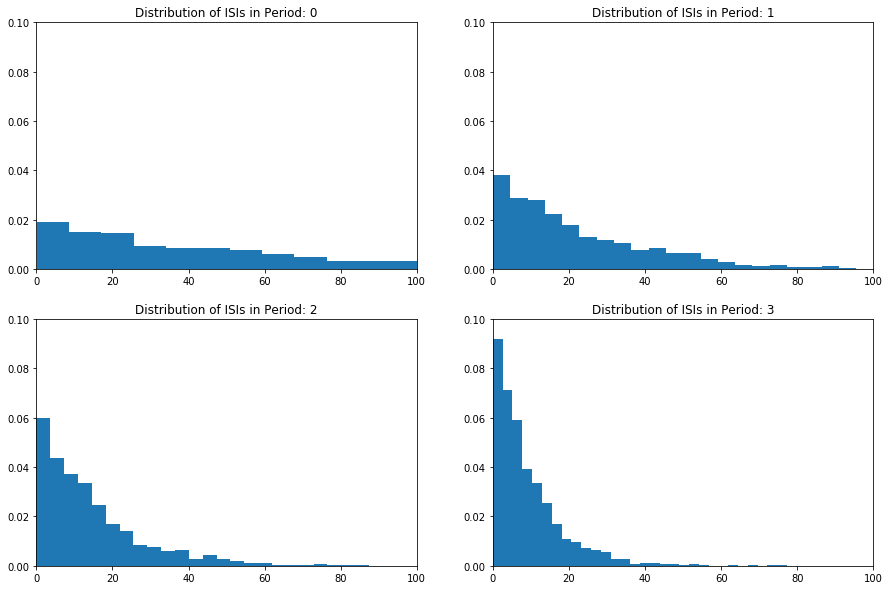

In [3]:
# frequencies in each period
print('OBSERVED FREQUENCIES WITHIN THE FOUR PERIODS:')
print(np.sum(a.T<2500*k)/(2500*k)*1000, ' Hz')
print(np.sum(np.logical_and(a.T>2500*k, a.T<5000*k)/(2500*k)*1000), ' Hz')
print(np.sum(np.logical_and(a.T>5000*k, a.T<7500*k)/(2500*k)*1000), ' Hz')
print(np.sum(np.logical_and(a.T>7500*k, a.T<10000*k)/(2500*k)*1000), ' Hz')

# ISIs in each period:
y = []
y.append(np.diff(a.T[np.where(a.T<2500*k)[0]]))
y.append(np.diff(a.T[np.where(np.logical_and(a.T>2500*k, a.T<5000*k))[0]]))
y.append(np.diff(a.T[np.where(np.logical_and(a.T>5000*k, a.T<7500*k))[0]]))
y.append(np.diff(a.T[np.where(np.logical_and(a.T>7500*k, a.T<10000*k))[0]]))

plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.hist(y[i], 30, density=True)
    plt.title('Distribution of ISIs in Period: ' + str(i))
    plt.xlim(0,100)
    plt.ylim(0,0.1)